In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [55]:
iris_data = load_iris()
data = iris_data['data']
targets = iris_data['target']
target_names = iris_data['target_names']
feature_names = iris_data['feature_names']

In [56]:
data = pd.DataFrame(data, columns=feature_names)
print(data[:10])
data = (data - data.mean()) / data.std(ddof=0)
print(data[:10])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

print(f'寄与値: {pca.explained_variance_ratio_}')
print(f'固有ベクトル: {pca.singular_values_}')

data_on_pca = pd.DataFrame(pca.transform(data))
data_on_pca['target'] = target_names[targets]
print(data_on_pca[:10])

寄与値: [0.72962445 0.22850762]
固有ベクトル: [20.92306556 11.7091661 ]
          0         1  target
0 -2.264703  0.480027  setosa
1 -2.080961 -0.674134  setosa
2 -2.364229 -0.341908  setosa
3 -2.299384 -0.597395  setosa
4 -2.389842  0.646835  setosa
5 -2.075631  1.489178  setosa
6 -2.444029  0.047644  setosa
7 -2.232847  0.223148  setosa
8 -2.334640 -1.115328  setosa
9 -2.184328 -0.469014  setosa


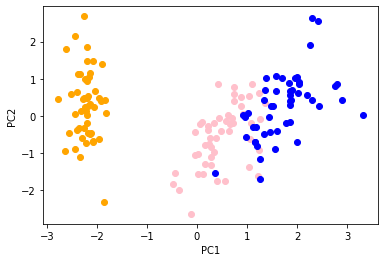

In [58]:
from matplotlib import pyplot as plt
import itertools

color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='PC1', ylabel='PC2')
for key, group in data_on_pca.groupby('target'):
    ax.scatter(group.iloc[:, 0], group.iloc[:, 1], c=next(color_cycle))
